In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_parquet("Dados Comercializacao.parquet")
dados = df.loc[(df['DATA'] >= '2024-07-29') & (df['DATA'] <= '2024-07-19')]
dados

,DATA,NOME,PRODUTO,VOLUME,DIA DA SEMANA,MES,TIPO
9978,2024-07-15,5501017-MS COMERCIO DE FRUTAS LT,03303-UVAS FINAS DE MESA,920.0,Segunda-feira,Jul,ATACADISTA
9979,2024-07-15,5500005-COMERCIO DE FRUTAS DANIE,03303-UVAS FINAS DE MESA,560.0,Segunda-feira,Jul,ATACADISTA
9980,2024-07-15,COMERCIO DE HORTIFRUTI BR,01403-LARANJA LIMA (CEU),360.0,Segunda-feira,Jul,ATACADISTA
9981,2024-07-15,COMERCIO DE HORTIFRUTI BR,01406-LARANJA SUCO,900.0,Segunda-feira,Jul,ATACADISTA
9982,2024-07-15,COMERCIO DE HORTIFRUTI BR,01401-LARANJA BAIA (UMBIGO),540.0,Segunda-feira,Jul,ATACADISTA
...,...,...,...,...,...,...,...
30211,2024-07-19,0114585-MOACIR DOS SANTOS GONCZO,10101-BATATA-DOCE,6000.0,Sexta-feira,Jul,PRODUTOR
30212,2024-07-19,0103033-RUDIMAR ANDRE BOFF,08102-CENOURA,7600.0,Sexta-feira,Jul,PRODUTOR
30213,2024-07-19,0113169-CARLOS RIVA,08102-CENOURA,8400.0,Sexta-feira,Jul,PRODUTOR
30214,2024-07-19,0100695-FABRICIO LUDOVICO SELAU,08102-CENOURA,9800.0,Sexta-feira,Jul,PRODUTOR


## Ranking de Comercialização
<hr>

Ranking Comercialização por Atacadistas

In [9]:
ranking_atacadistas = dados.copy(deep=True)
ranking_atacadistas = ranking_atacadistas.loc[ranking_atacadistas['TIPO'] == 'ATACADISTA']
ranking_atacadistas = ranking_atacadistas.groupby(['PRODUTO'])['VOLUME'].sum()
ranking_atacadistas = ranking_atacadistas.nlargest(10)
ranking_atacadistas = ranking_atacadistas.reset_index()

Ranking Produtores

In [10]:
ranking_produtores = dados.copy(deep=True)
ranking_produtores = ranking_produtores.loc[ranking_produtores['TIPO'] == 'PRODUTOR']
ranking_produtores = ranking_produtores.groupby(['PRODUTO'])['VOLUME'].sum()
ranking_produtores = ranking_produtores.nlargest(10)
ranking_produtores = ranking_produtores.reset_index()

Ranking Geral

In [11]:
ranking_geral = dados.copy(deep=True)
ranking_geral = ranking_geral.groupby(['PRODUTO'])['VOLUME'].sum()
ranking_geral = ranking_geral.nlargest(10)
ranking_geral = ranking_geral.reset_index()

In [12]:
def volume_produtos_ranking(dados, periodo, tipo, paleta_cores):
    # Copia os dados para evitar modificação no original
    top_10 = dados.copy(deep=True)
    top_10 = top_10[['PRODUTO', 'VOLUME']]  # Seleciona colunas relevantes
    top_10 = top_10.loc[top_10['PRODUTO'] != "TODOS"]  # Filtra produtos diferentes de "TODOS"

    # Agrega e ordena os dados por volume
    top_10 = top_10.groupby('PRODUTO').agg('sum').sort_values('VOLUME', ascending=False)
    top_10 = top_10[:10]  # Pega os top 10 produtos
    top_10 = top_10.reset_index()

    # Transforma os nomes dos produtos
    top_10['PRODUTO'] = top_10['PRODUTO'].apply(lambda x: x[6:])
    top_10['PRODUTO'] = top_10['PRODUTO'].str.replace('LONGA VIDA', 'L.V').str.replace('COMUM / CAI', 'COMUM')

    # Cria o gráfico de barras
    fig, ax = plt.subplots(figsize=(18, 10))
    fig.subplots_adjust(right=0.6, left=0.5)
    sns.set_theme(style="white")

    # Utiliza a paleta de cores padrão do Seaborn chamada "Greens"
    ax = sns.barplot(data=top_10, x="VOLUME", y='PRODUTO', palette=paleta_cores)

    # Personaliza o gráfico
    ax.set_title(f'Top 10 produtos com maior volume comercializado\n no período de {periodo} - {tipo}',
                 fontsize=20, color="#181819", loc='right', pad=25, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_xticklabels([])
    ax.yaxis.set_tick_params(labelsize=10, labelcolor="#181819")

    sns.despine(left=True, bottom=True)

    # Escreve os valores de cada barra no gráfico
    for i, valor in enumerate(top_10['VOLUME']):
        qtd = f'{(valor / 1000):,.1f} (ton)'.replace(',', '.')
        offset = 1e3
        if i < 2:  # Apenas os dois maiores valores terão a cor branca
            ax.text(valor - offset, i, qtd, color="white", fontsize=14, fontweight='bold', ha='right', va='center')
        else:
            ax.text(valor - offset, i, qtd, color="#181819", fontsize=14, fontweight='bold', ha='right', va='center')

    # Define o fundo branco
    fig.set_facecolor('white')
    ax.set_facecolor('white')
    
    ax.grid(False)
    # Ajusta o layout
    fig.tight_layout()

    return ax, fig

Ranking Comercialização Produtores

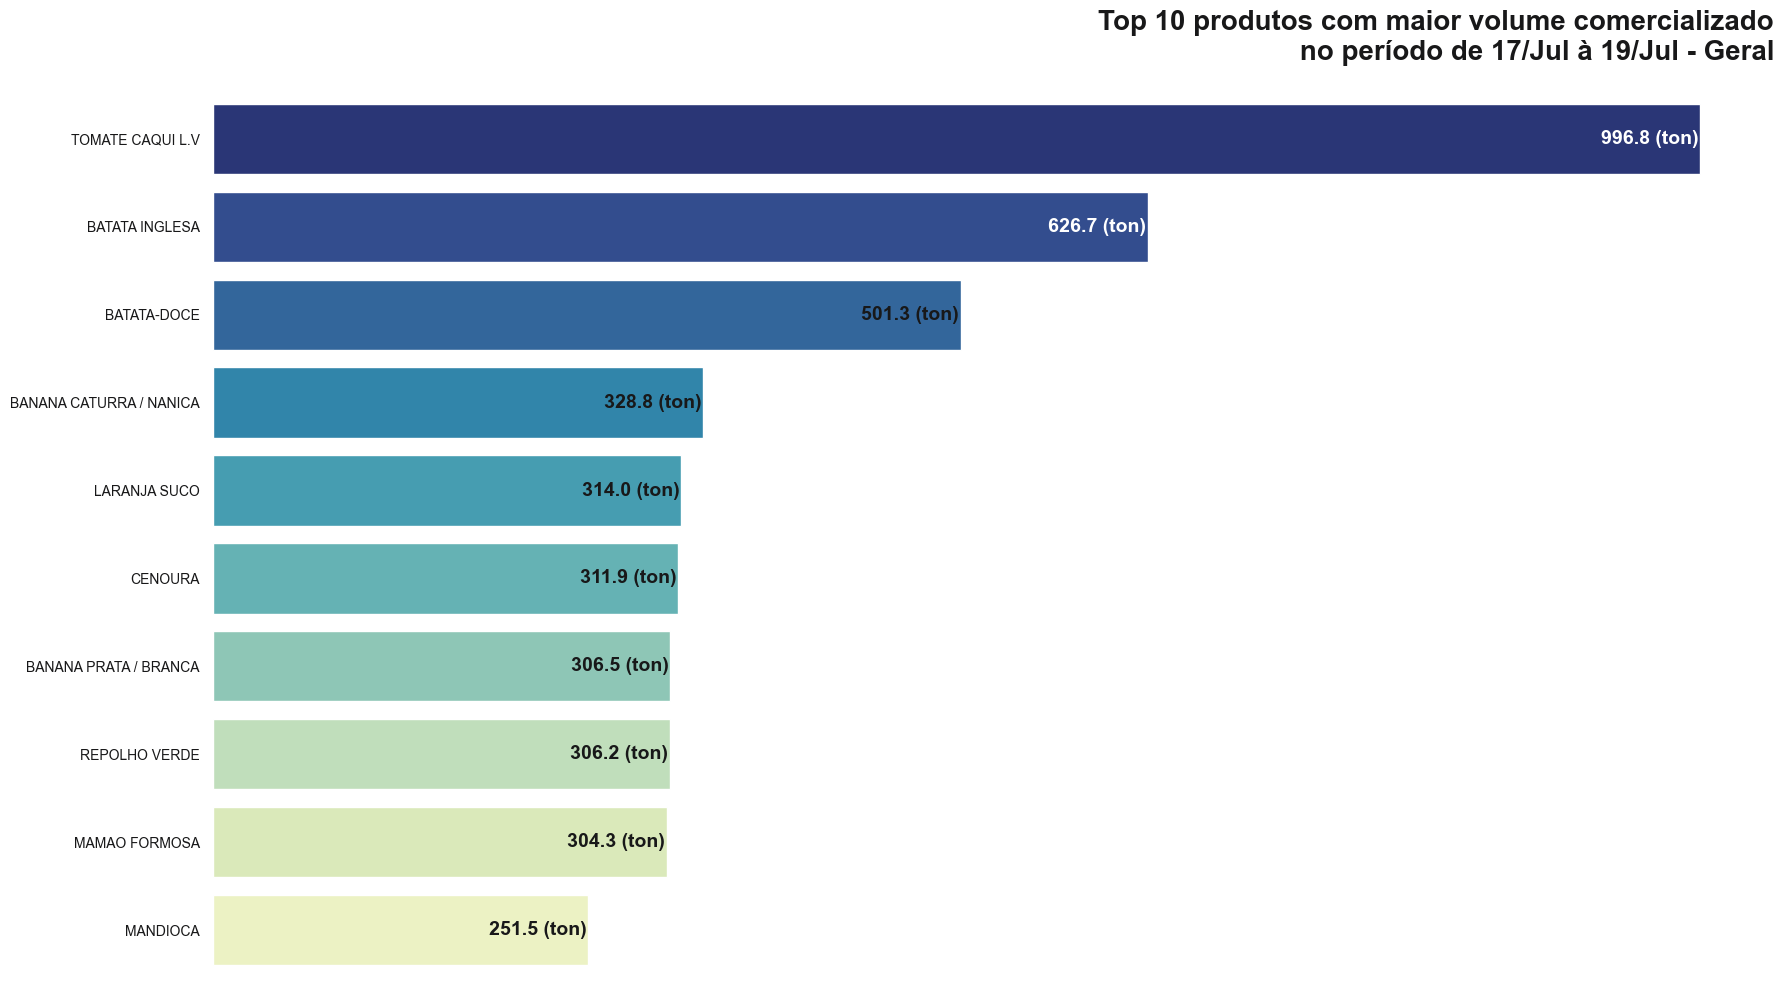

In [14]:
# YlGnBu_r -> GERAIS
# Blues_r -> ATACADISTAS
# Greens_r -> PRODUTORES

tipo = 'Geral'
cores = 'YlGnBu_r'

ax, fig = volume_produtos_ranking(ranking_geral,'17/Jul à 19/Jul',tipo, cores)
# fig.show()
fig.savefig(f"Ranking {tipo} de 15-jul a 19-jul.png")